<a href="https://colab.research.google.com/github/jalfred911/HNG/blob/master/mltask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# import some libraries
import os, cv2, itertools
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline


In [0]:
#mount google drive 
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


In [0]:
#declare image paths

plate_numbers_dir =  '/gdrive/My Drive/plate_number_classification/plate_numbers/' 
negative_image_dir = '/gdrive/My Drive/plate_number_classification/negative_image/' 
#set rows and cols to 64 and channel to 3
ROWS = 64
COLS = 64
CHANNELS = 3

In [0]:
plate_numbers_img = [plate_numbers_dir+i for i in os.listdir(plate_numbers_dir)]
negative_image_img = [negative_image_dir+i for i in os.listdir(negative_image_dir)]

In [0]:
def read_image(file_path):
    img = cv2.imread(file_path, cv2.IMREAD_COLOR)
    return cv2.resize(img, (ROWS, COLS), interpolation = cv2.INTER_CUBIC)

In [0]:
def prep_data(images):
    m = len(images)
    n_x = ROWS*COLS*CHANNELS
    
    X = np.ndarray((n_x,m), dtype = np.uint8)
    y = np.zeros((1,m))

    print("X.shape is {}".format(X.shape))

    for i,image_file in enumerate(images):

        image = read_image(image_file)

        X[:,i] = np.squeeze(image.reshape((n_x,1)))

        if '-' in image_file.lower():
            y[0,i] = 1

        elif 'image' in image_file.lower():
          y[0,i] = 0

          
        if i%100 == 0 :
            print("Proceed {} of {}".format(i, m))

    return X,y
     

In [0]:
plate_img, negative_img = prep_data(plate_numbers_img + negative_image_img)

X.shape is (12288, 100)
Proceed 0 of 100


In [0]:
classes = {0: 'Negative_Image',         
          1: 'Plate_Number'}

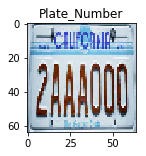

In [0]:
def show_images(X, y, idx) :
        image = X[idx]
        image = image.reshape((ROWS, COLS, CHANNELS))
        plt.figure(figsize=(4,2))
        plt.imshow(image),
        plt.title(classes[y[idx,0]])
        plt.show()
show_images(plate_img.T, negative_img.T, 0)

In [0]:
from sklearn.linear_model import LogisticRegressionCV



In [0]:
clf = LogisticRegressionCV()


In [0]:
plate_img_lr, neg_img_lr = plate_img.T, negative_img.T.ravel()


In [0]:
clf.fit(plate_img_lr, neg_img_lr)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


LogisticRegressionCV(Cs=10, class_weight=None, cv='warn', dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='warn', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [0]:
print("Model accuracy: {:.2f}%".format(clf.score(plate_img_lr, neg_img_lr)*100))

Model accuracy: 100.00%


In [0]:
def show_image_prediction(X, idx, model) :
    image = X[idx].reshape(1,-1)
    image_class = classes[model.predict(image).item()]
    image = image.reshape((ROWS, COLS, CHANNELS))
    plt.figure(figsize = (4,2))
    plt.imshow(image)
    plt.title("Test {} : I think this is {}".format(idx, image_class))
    
    plt.show()

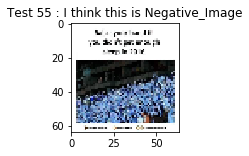

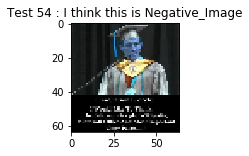

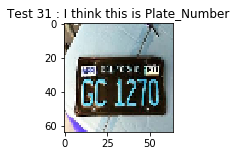

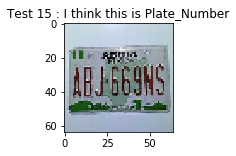

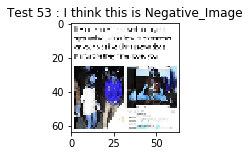

In [0]:
plate_img_lr, neg_img_lr = plate_img.T, negative_img.T

for i in np.random.randint(0, len(plate_img_lr), 5) :
    show_image_prediction(plate_img_lr, i, clf)